In [1]:
library("tidyverse")

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
library("vegan")

Warning message:
"package 'vegan' was built under R version 3.6.3"Loading required package: permute
Loading required package: lattice
This is vegan 2.5-7


In [3]:
df<-read.csv(file.choose(),header=T)


In [4]:
df<-na.omit(df)

In [5]:
df<-df %>% 
filter(club_position!="SUB") %>% 
filter(club_position!="RES") %>% 
drop_na()

In [6]:
df<-df %>% 
mutate(position=
      case_when(club_position== "CF" ~ "Striker",
               club_position=="RW"~"Winger",
                club_position=="LM"~"Winger",
                 club_position=="RM"~"Winger",
               club_position=="LW"~"Winger",
               club_position=="LF"~"Striker",
               club_position=="RF"~"Striker",
               club_position=="ST"~"Striker",
               club_position=="LS"~"Striker",
               club_position=="RS"~"Striker",
               club_position=="CDM"~"Defensive_Midfield",
               club_position=="CDM"~"Defensive_Midfield",
               club_position=="CAM"~"Attacking_Midfield",
               club_position=="LDM"~"Defensive_Midfield",
               club_position=="RDM"~"Defensive_Midfield",
               club_position=="RCM"~"Central_Midfield",
               club_position=="LCM"~"Central_Midfield",
               club_position=="RCM"~"Central_Midfield",
               club_position=="LDM"~"Defensive_Midfield",
               club_position=="LAM"~"Attacking_Midfield",
               club_position=="RAM"~"Attacking_Midfield",
               club_position=="CB"~"Defender",
               club_position=="RCB"~"Defender",
               club_position=="LCB"~"Defender",
               club_position=="RB"~"Right_Back",
               club_position=="RWB"~"Right_Back",
               club_position=="LB"~"Left_Back",
               club_position=="LWB"~"Left_Back",
               club_position=="GK"~"Goalie"))

In [7]:
df<-drop_na(df)

In [9]:
df_var<-select(df,-league_name,-preferred_foot,-position,-club_position)

In [10]:
df_var<-df_var[1:2000,]

In [11]:
df.mds <- metaMDS(comm = df_var, distance = "bray", trace = FALSE, autotransform = FALSE)

#creating a dissimilarity matrix with your chosen metric that measures the similarity between every pair of samples
#creating an ordination plot from that dissimilarity matrix

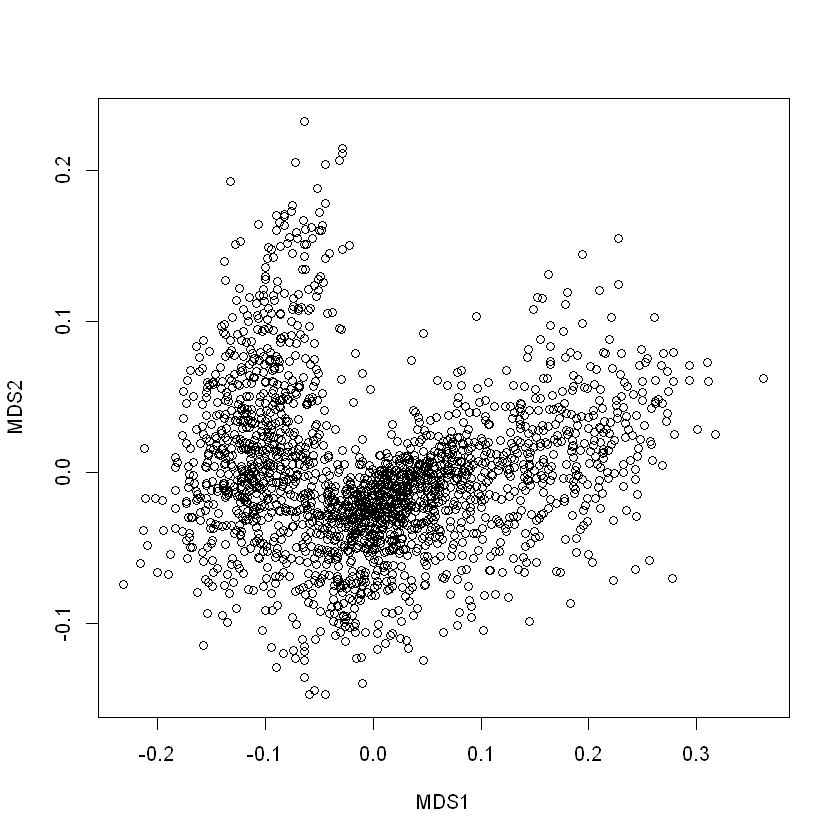

In [12]:
plot(df.mds$points)

In [13]:
MDS_xy <- data.frame(df.mds$points)

In [14]:
df<-df[1:2000,]

In [15]:
MDS_xy$foot <- df$preferred_foot
MDS_xy$position <- df$position


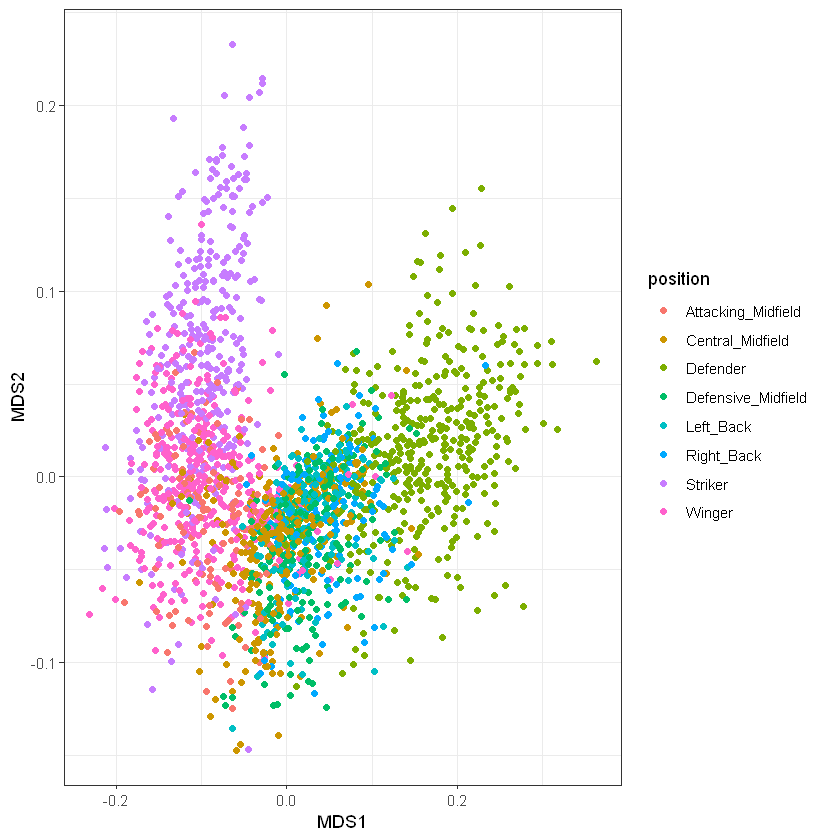

In [16]:
library(ggplot2)
ggplot(MDS_xy)+geom_point(aes(MDS1,MDS2,color=position))+
  theme_bw()

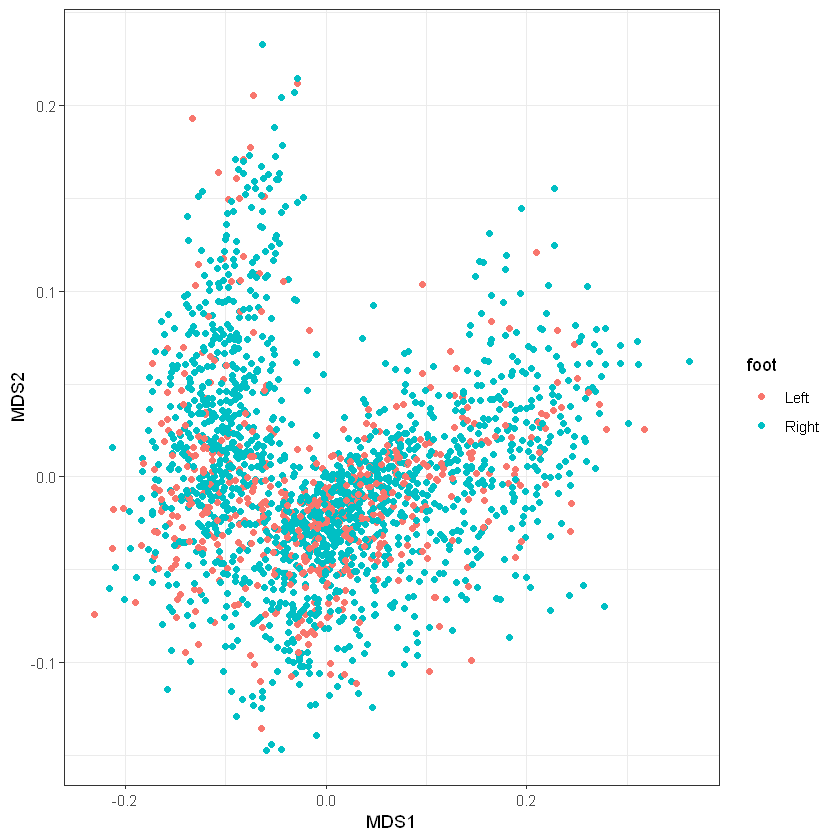

In [17]:
library(ggplot2)
ggplot(MDS_xy)+geom_point(aes(MDS1,MDS2,color=foot))+
  theme_bw()